# 라이브러리

In [2]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [34]:
import seaborn as sns 
import matplotlib as plt
import os

In [29]:
#!pip install pandas-datareader
from pandas_datareader import data, wb

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

# 데이터 불러오기

In [24]:
os.getcwd() #current working directory

'C:\\Users\\JIIN\\OneDrive\\Documents\\Github\\2021_Python\\Py_DS_ML_Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master'

In [4]:
df = pd.read_pickle('.\\10-Data-Capstone-Projects\\all_banks')

In [6]:
df.head(1)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   

Bank Ticker           ...     MS                                 WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume  Open   High   
Date                  ...                                                     
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.6  31.98   

Bank Ticker                        
Stock Info    Low Close    Volume  
Date                               
2006-01-03   31.2  31.9  11016400  

[1 rows x 30 columns]

- Bank of America
- CitiGroup
- Goldman Sachs
- JPMorgan Chase
- Morgan Stanley
- Wells Fargo

In [4]:
# data from Jan 1st 2006 to Jan 1st 2016 : set datetime 
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [8]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [10]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [7]:
# create a list of the ticker symbols 
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [8]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [28]:
# axis = 1 column append | default는 row append
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1, keys = tickers) 

In [21]:
bank_stocks.head(2)

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.425114   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.059509   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   

                                                WFC                     \
                Close     Volume  Adj Close    High     Low       Open   
Date                                                                     
2006-01-03  58.310001  5377000.0  36.786667  31.975  31.195  31.600000   
2006-01-04  58.349998  7977800.0  36.811905  31.820  31.365  31.799999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.658106  
2006-01-04  31.530001  10870000.0  20.418499  

[2 rows x 36 columns]

* documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

# 시각화 세팅 (스타일, 폰트 등)

### 스타일 1     plt.style.use

In [84]:
print(plt.style.available)    # 사용가능한 스타일

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [81]:
plt.style.use('seaborn')
#plt.style.use('fivethirtyeight')
# plt.style.use('bmh')
# plt.style.use('dark_background')
#plt.style.use('seaborn-pastel')

In [82]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if  system_name == "Windows":
        font_family = "Malgun Gothic"
    return font_family

In [83]:
font_family = get_font_family()
get_font_family()  
plt.rc('font', family=font_family)    
plt.rc('axes', unicode_minus=False)   # minus 폰트 깨짐

### 스타일 2 sns.set_style & plotly

In [88]:
sns.set_style('whitegrid')
%matplotlib inline          # Jupiter notebook, other editor: plt.show()

UsageError: unrecognized arguments: # Jupiter notebook, other editor: plt.show()


In [126]:
# ! pip install cufflinks
import plotly
# import cufflinks as cf
# cf.go_offline()

In [122]:
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# for notbooks
init_notebook_mode(connected=True)
# for offline use
#cf.go_offline()
print(__version__) # requires version >= 1.9.0

4.0.0


# EDA

In [10]:
# Column index : MultiIndex
df.columns

MultiIndex(levels=[['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], ['Open', 'High', 'Low', 'Close', 'Volume']],
           codes=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['Bank Ticker', 'Stock Info'])

In [11]:
# multi index columns name 지정
df.columns.names = ['Bank Ticker', 'Stock Info']

In [12]:
df.columns.names

FrozenList(['Bank Ticker', 'Stock Info'])

In [13]:
# max close price for each bank
df.xs(key='Close', axis=1, level = 'Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

- Percentage change between the current and a prior element. : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html
- Return defined by $$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [14]:
# returns for each bank's stock : returns = 
returns = pd.DataFrame()
for  i in tickers :
    returns[i+' Return'] = df[i]['Close'].pct_change()
returns.head() 

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [15]:
# Prior없는 start date NaN 
returns.iloc[0,:]

BAC Return   NaN
C Return     NaN
GS Return    NaN
JPM Return   NaN
MS Return    NaN
WFC Return   NaN
Name: 2006-01-03 00:00:00, dtype: float64

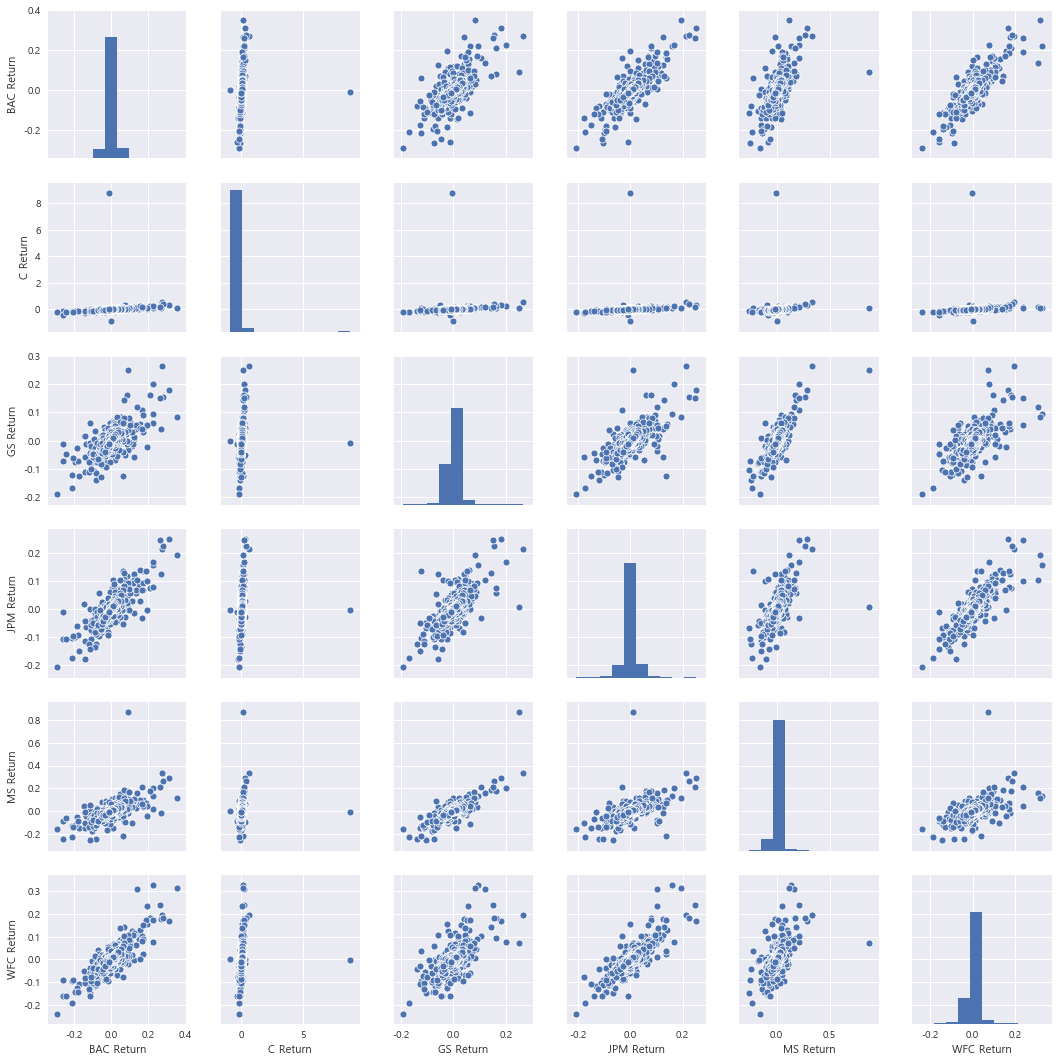

In [74]:
# Pairplot 
sns.pairplot(returns[1:], diag_kind ='hist', diag_kws = {'bins':10})

In [17]:
returns.idxmin()
# BAC GS JPM WFC 모두 같은날 WORST DROP : 2009-1-20

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [19]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [20]:
returns.std() 
# std higher = risker >> C

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [23]:
# datetime 인덱스 특정기간 데이터 조회
# returns.ix['2015-01-01':'2015-12-31'].head()
returns.ix['2015-01-01':'2015-12-31'].std()
# risk 유사, MS/BAC 다소 높은 편

C:\Users\JIIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

C:\Users\JIIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


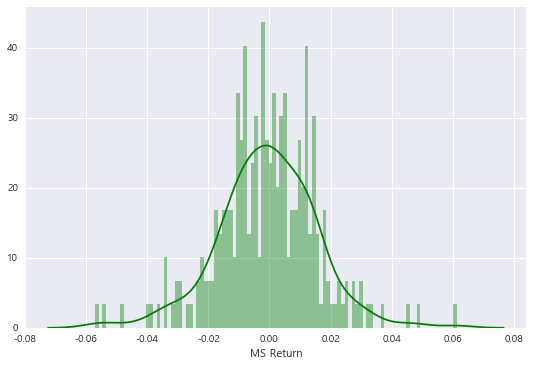

In [75]:
# 분포 파악 sns.distplot(data,color='',bins='')
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'], 
             color ='green',bins=100)

-- 왜도와 첨도
*왜도 skewness

    - 실수 값 확률 변수의 확률 분포의 비대칭성 
    - - :: 왼쪽 긴 꼬리 오른쪽에 더 많은 데이터 분포
    - + 오른쪽 긴 꼬리 왼쪽에 더 많은 데이터 분포
    - 0 :: 평균=중앙값

*첨도 kurtosis

    - 확률분포의 뾰족한 정도, 데이터가 중심에 몰려있는 정도
    - k 3에 가까우면 산포도가 정규분포에 가까움
    - k < 3 정규분포보다 더 완만하게 납작
    - k > 3 정규분포보다 더 뾰족하게


C:\Users\JIIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


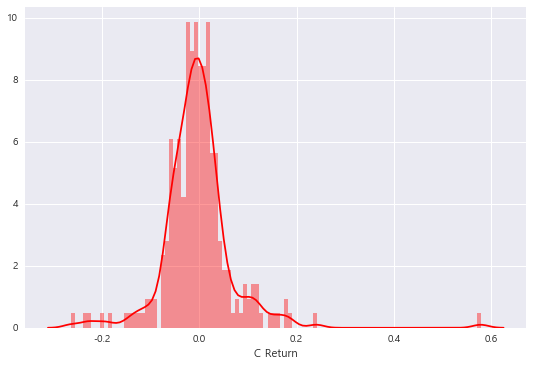

In [79]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],
            color ='red', bins=100)

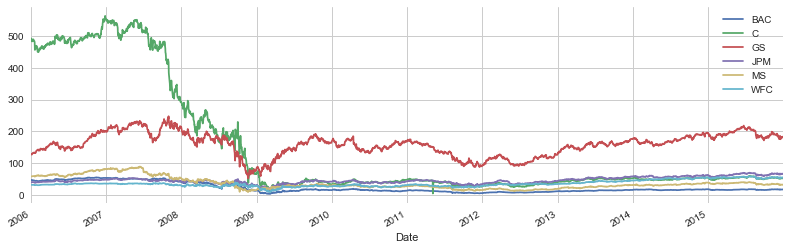

In [108]:
# "plotname".legend() 범례추가 | 범례 위치 matplotlib 설정 plt.legend(loc=0)
for tick in tickers:
    plt=df[tick]['Close'].plot(figsize=(12,4), label=tick)
plt.legend() 

In [111]:
size = (12,4)

Text(0.5, 1.0, 'Close Price')

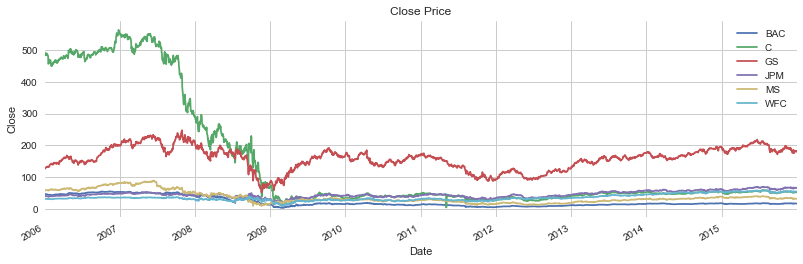

In [113]:
plt_close = df.xs(key='Close', axis=1, level = 'Stock Info').plot(figsize=size)
plt_close.legend()
plt_close.set_ylabel('Close')
plt_close.set_title('Close Price')

In [114]:
df.head(1)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   

Bank Ticker           ...     MS                                 WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume  Open   High   
Date                  ...                                                     
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.6  31.98   

Bank Ticker                        
Stock Info    Low Close    Volume  
Date                               
2006-01-03   31.2  31.9  11016400  

[1 rows x 30 columns]

#### Moving Averages
moving avg in the year 2008
-- rolling 30 day average against the close price for BOA stock for 2008

In [145]:
# figure : module object is not callable error
import matplotlib.pyplot as plt

C:\Users\JIIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



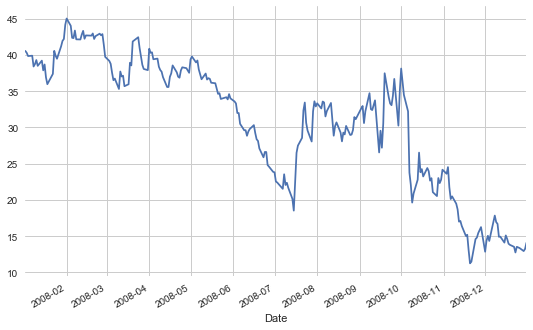

In [154]:
df.xs(key='BAC', axis=1, level='Bank Ticker').ix['2008-01-01':'2008-12-31']['Close'].plot()

C:\Users\JIIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\Users\JIIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



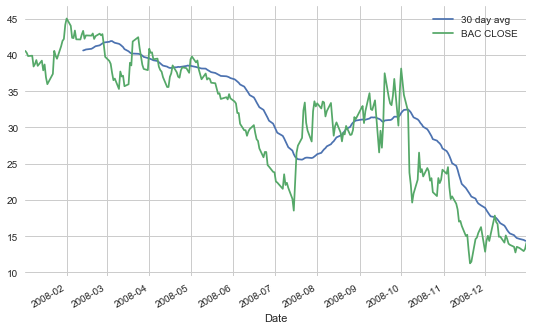

In [155]:
plt.figure() # create figure (empty canvas)
df.xs(key='BAC', axis=1, level='Bank Ticker').ix['2008-01-01':'2008-12-31']['Close'].rolling(window=30).mean().plot(label='30 day avg')
df.xs(key='BAC', axis=1, level='Bank Ticker').ix['2008-01-01':'2008-12-31']['Close'].plot(label='BAC CLOSE')
plt.legend()

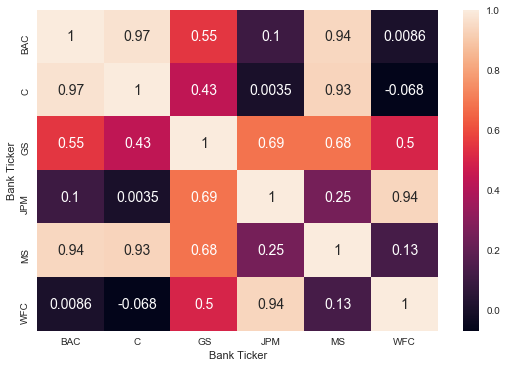

In [164]:
# sns.heatmap :: Correlation between the stocks Close Price
# annot = True 그래프에 label
sns.heatmap(df.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)

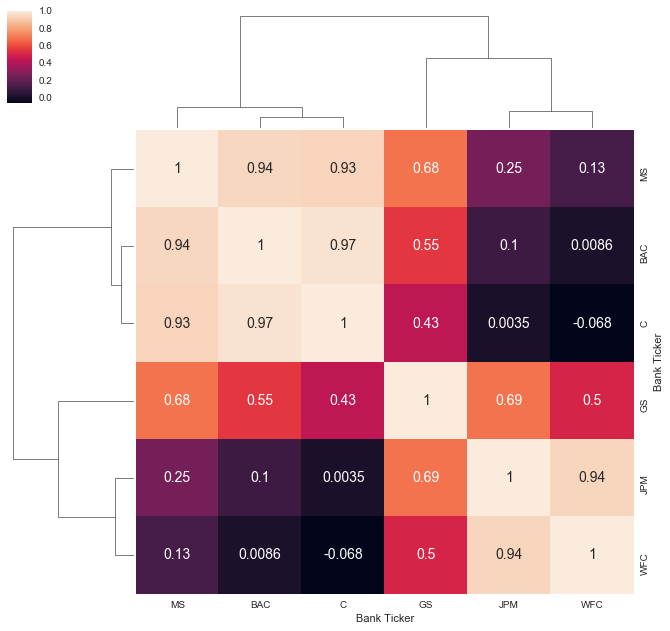

In [166]:
# Clustermap :: sns.clustermap()
sns.clustermap(df.xs(key='Close', level='Stock Info', axis=1).corr(), annot =True)

- sns.heatmap vs sns.clustermap